<a href="https://colab.research.google.com/github/snghynn/stat_programming/blob/main/stat_programming_6_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install ISLP

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

# Problem 1: Iris data

We will be using the famous Iris dataset, which contains measurements of the sepal length, sepal width, petal length, and petal width for three species of iris flowers (Iris setosa, Iris versicolor, and Iris virginica). The goal is to predict the species of an iris flower based on these measurements.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Convert the data to PyTorch tensors
X = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target, dtype=torch.long)

t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
t = torch.tensor(t, dtype=torch.float32)


# Normalize the input data
mean = torch.mean(X, dim=0)
std = torch.std(X, dim=0)
X = (X - mean) / std

# Split the dataset into training and validation sets
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

# Create PyTorch Datasets
train_dataset = TensorDataset(X_train, t_train)
val_dataset = TensorDataset(X_val, t_val)

# Define the data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

<ipython-input-3-d11aa3dd3743>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
<ipython-input-3-d11aa3dd3743>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, dtype=torch.float32)


Use `neural networks` and `multinomial logistic regression model` to classiy the iris, and calculate the test error. Try to provide the best `neural networks` with the smallest test error rate.

In [ ]:
## neural network
# neural network class 생성
class my_dn(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(4, 128)
        self.linear2 = torch.nn.Linear(128, 64)
        self.linear3 = torch.nn.Linear(64, 32)
        self.linear4 = torch.nn.Linear(32, 3)
        self.relu1 = torch.nn.ReLU()
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu1(x)
        x = self.linear3(x)
        x = self.relu1(x)
        x = self.linear4(x)
        x = self.relu1(x)
        return x

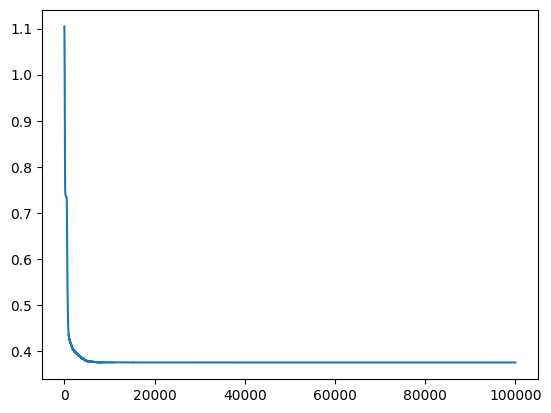

In [ ]:
# model, loss ftn, optimizer 정의
DN = my_dn()
loss_ftn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(DN.parameters(), lr=0.01)

history = []
epochs = 100000

for epoch in range(epochs):
  running_loss = 0
  for xx, tt in train_loader:
    optimizer.zero_grad()
    zhat = DN(xx)
    loss = loss_ftn(zhat, tt)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(train_loader.dataset))

plt.plot(history)

In [ ]:
# accuracy 계산
for xx, tt in test_loader:
    zhat_test = DN(xx) #x_test: [n_test, 4]
    Q_test = torch.softmax(zhat_test, axis=1) # Q_test: [n_test, 3]
    y_hat = torch.argmax(Q_test, axis=1).to(torch.float32) #y_hat: [n_test,]
    yy    = torch.argmax(tt, axis=1).to(torch.float32) #y_hat: [n_test,]

accuracy = sum(y_hat == yy)/len(val_dataset)
accuracy

tensor(0.7000)

In [ ]:
# test error 계산
test_error = 1 - accuracy
test_error

tensor(0.3000)

## Exercise 2.3.3. Iris data

We will be using the famous Iris dataset, which contains measurements of the sepal length, sepal width, petal length, and petal width for three species of iris flowers (Iris setosa, Iris versicolor, and Iris virginica). The goal is to predict the species of an iris flower based on these measurements.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Convert the data to PyTorch tensors
X = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target, dtype=torch.long)

t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
t = torch.tensor(t, dtype=torch.float32)


# Normalize the input data
mean = torch.mean(X, dim=0)
std = torch.std(X, dim=0)
X = (X - mean) / std

# Split the dataset into training and validation sets
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

# Create PyTorch Datasets
train_dataset = TensorDataset(X_train, t_train)
val_dataset = TensorDataset(X_val, t_val)

# Define the data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

<ipython-input-9-8c6f6fee426b>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
<ipython-input-9-8c6f6fee426b>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, dtype=torch.float32)


Use multinomial logistic regression model to classify the iris, and calculate the test error.

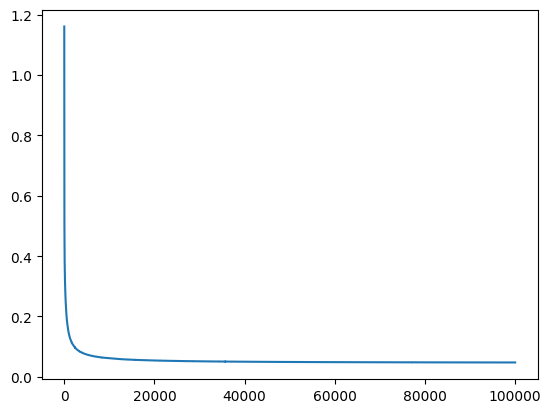

In [ ]:
## logistic regression model
# model 정의
z_model = torch.nn.Linear(4, 3, bias=True)
# loss function 정의
loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')
# optimizer 정의
optimizer = torch.optim.SGD(z_model.parameters(), lr=0.01)
# 초기화 및 parameter정의
history = []
epochs = 100000
n = len(train_loader.dataset)
# model
for epoch in range(epochs):
  epoch_loss = 0.0
  for xx, tt in train_loader:
    zhat = z_model(xx) #xx@W+b
    loss = loss_fn(zhat, tt) # loss 계산
    loss.backward()
    epoch_loss += loss.item()*len(xx)
    optimizer.step()
    optimizer.zero_grad()
  history.append(epoch_loss/n)
plt.plot(history)

In [ ]:
# 정확도 계산 함수 생성
def accuracy_ftn(qhat, t):
  yhat = torch.argmax(qhat, axis=1).to(torch.float32)
  y = torch.argmax(t, axis=1).to(torch.float32)
  accuracy = torch.mean((y==yhat).to(torch.float32))
  return accuracy

In [ ]:
# 정확도 계산
zhat = z_model(X_val) # with test data
qhat = torch.softmax(zhat, axis=1)
accuracy = accuracy_ftn(qhat, t_val)
accuracy # 정확도가 100%에 수렴한다.

tensor(1.)

In [ ]:
# test error 계산
test_error = 1 - accuracy
test_error

tensor(0.)

neural network에 비해 multinomial logistic regression의 test error가 더 낮은 것으로 볼 때, 이 경우에는 multinomial logistic regression이 더 좋은 모델이라고 할 수 있다.

## Problem 2: Fashion MNIST data

You are given the following fashion MNIST data. Use `the multinomial regression` and `neural networks` so that the model can determine the label from the images. Calculate the test accuracy. Compare your test accuracy with that of the `linear` version of the `multinomial regression`.


Hint: Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [ ]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
validationset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)
test_loader = DataLoader(validationset, batch_size=64, shuffle=True)

In [ ]:
xx, yy = trainset[0]

Ankle boot


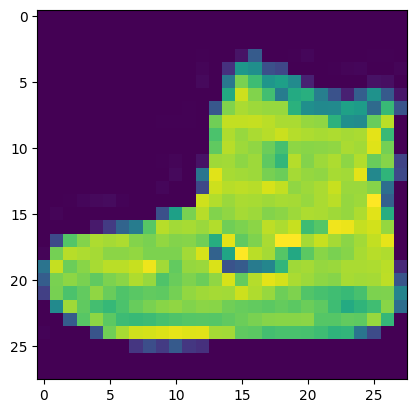

In [ ]:
plt.imshow(xx.reshape(28,28))
my_name = { 0: "T-shirt/top", 1: "Trouser",
              2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
print(my_name[yy])

< multinomial regression >

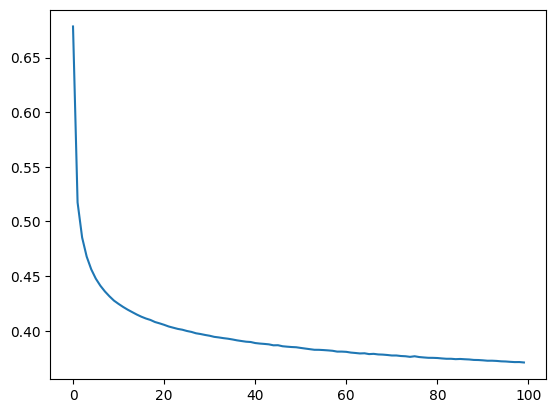

In [ ]:
# model 정의
z_model2 = torch.nn.Linear(784, 10, bias=True)
loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')

# optimizer 정의
optimizer = torch.optim.SGD(z_model2.parameters(), lr=0.01)

# parameter 정의
history = []
epochs = 100
n = len(train_loader.dataset)

# modeling
for epoch in range(epochs):
  epoch_loss = 0.0
  for xx, tt in train_loader:
    zhat = z_model2(xx.reshape(-1,784)) #xx@W+b
    loss = loss_fn(zhat, tt)
    loss.backward()
    epoch_loss += loss.item()*len(xx)
    optimizer.step()
    optimizer.zero_grad()

  history.append(epoch_loss/n)

# history plot
plt.plot(history)

In [ ]:
# accuracy 계산
sum_acc = 0
for xx, tt in test_loader:
    zhat_test = z_model2(xx.reshape(-1,28*28)) #x_test: [n_test, 784]
    Q_test = torch.softmax(zhat_test, axis=1) # Q_test: [n_test, 10]
    y_hat = torch.argmax(Q_test, axis=1).to(torch.float32) #y_hat: [n_test,]
    sum_acc += torch.sum(y_hat == tt)

accuracy = sum_acc/len(validationset)
print('multinomial accuracy:', accuracy)

multinomial accuracy: tensor(0.8424)


< neural network >

In [ ]:
# class를 이용해 neural network 생성
class my_dn2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(784, 128)
        self.relu1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(128, 64)
        self.linear3 = torch.nn.Linear(64, 32)
        self.linear4 = torch.nn.Linear(32, 10)
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu1(x)
        x = self.linear3(x)
        x = self.relu1(x)
        x = self.linear4(x)
        x = self.relu1(x)
        return x

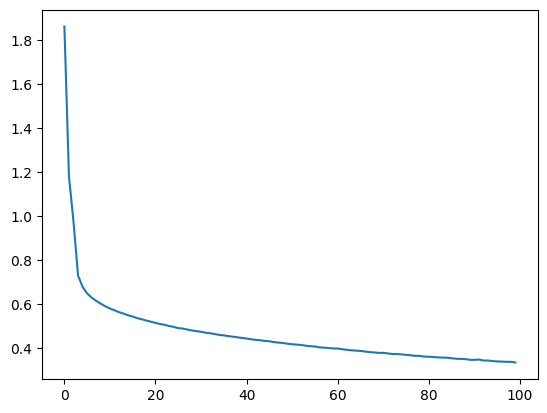

In [ ]:
# model 정의
DN2 = my_dn2()
# loss function 정의
loss_ftn = torch.nn.CrossEntropyLoss()
# optimizer 정의
optimizer = torch.optim.SGD(DN2.parameters(), lr=0.01)
# parameter 정의
epochs = 100
history = []
# modeling
for epoch in range(epochs):
  running_loss = 0
  for xx, tt in train_loader:
    optimizer.zero_grad()
    zhat = DN2(xx.reshape(-1,784))
    loss = loss_ftn(zhat, tt)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(train_loader.dataset))
# history plot 그리기
plt.plot(history)

In [ ]:
# accuracy 계산
sum_acc = 0
for xx, tt in test_loader:
    zhat_test = DN2(xx.reshape(-1,28*28)) #x_test: [n_test, 784]
    Q_test = torch.softmax(zhat_test, axis=1) # Q_test: [n_test, 10]
    y_hat = torch.argmax(Q_test, axis=1).to(torch.float32) #y_hat: [n_test,]
    sum_acc += torch.sum(y_hat == tt)

accuracy = sum_acc/len(validationset)
print('DN accuracy:', accuracy)

DN accuracy: tensor(0.8134)


neural network에 비해 multinomial logistic regression의 test accuracy가 더 높은 것으로 볼 때, 이 경우에는 multinomial logistic regression이 더 좋은 모델이라고 할 수 있다.